In [3]:
# Using a decision tree to determine a flower's species based on its features

# Importing libraries

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Loading the data set

data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Splitting data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], random_state = 0)

In [6]:
# Tuning model hyperparameters
# Decision tree will have 3 splits before coming to a prediction

clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)


In [8]:
# Training the model

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [9]:
# Predicting labels for new types of flowers

clf.predict(X_test.iloc[0].values.reshape(1, -1))

/Users/dominicvaldiserri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

In [11]:
# Predicting multiple observations at once

clf.predict(X_test[0:15])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1])

In [12]:
# Using accuracy to measure model performance
# Seeing how model performs on new data

score = clf.score(X_test, y_test)
print(score)

0.9736842105263158


In [13]:
# Finding optimal max_depth to ensure model accuracy

max_depth_range = list(range(1, 6))

accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    accuracy.append(score)

/var/folders/mg/9jsf_wmj1w3bbglw66_q97cw0000gn/T/ipykernel_49457/1892608663.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklist)


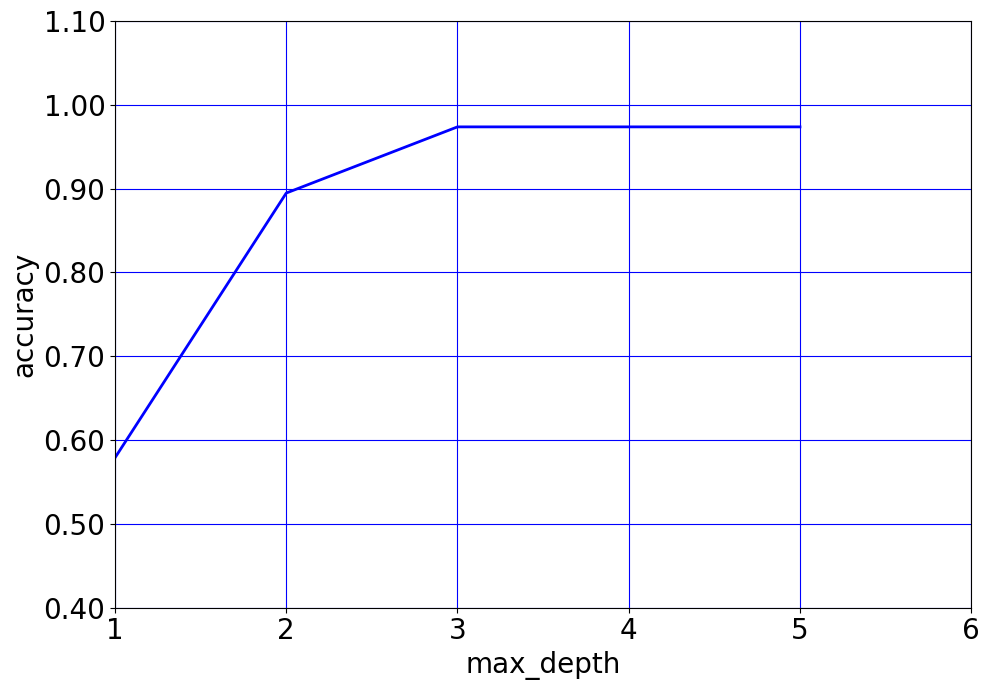

In [18]:
# Displaying optimal max_depth in a figure

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7));

ax.plot(max_depth_range, 
        accuracy, 
        lw = 2, 
        color = 'b')

ax.set_xlim([1, 6])
ax.set_ylim([0.4, 1.1])
ax.grid(True, 
        axis = 'both',
        zorder = 0,
        linestyle = '-',
        color = 'b')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 20)
ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.set_xlabel('max_depth', fontsize = 20)
ax.set_ylabel('accuracy', fontsize = 20)
fig.tight_layout()

In [19]:
# Model accuracy increases up to a max_depth of 3